# Project 2
### Web Scraping with requests and Beautiful Soup

### Professor - I was not able to complete this assignment as described in the Module. 
#### 1) I followed the assignment last week (Part 1 of the Project 2) that had me webscape and come up with questions. However, that assignment never indicated that the data would have to be plotted.
#### 2) This week I went to work on answering the questions and found that the data is text with format and I do not have the skillset to clean this data and strip extra characters to be able to even consider using it for programatically answering questions
#### 3) The dataset that met the requirements for last week's part 1 is not suitable for seaborn because it is not statistical data that is well versed for the plotting work.

### What I have below:
#### - Evidence of webscraping to set up to answer the questions
#### - Dataframes showing the results and tables as indicated
#### - Initial set up of a seaborn plot that I cannor use due to the text-based data

### I am looking forward to further guidance and feedback on this because I am at a loss on how to move this forward without having to spend many more hours starting from the beginning (and I haven't found an usable site despite already spending hours looking).

In [94]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns

In [96]:
# For this project I am using Yahoo Finance


In [128]:
## GAINERS 

urlGain='https://finance.yahoo.com/gainers?count=150&offset=0'


response = requests.get(urlGain)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")
    
soup = bs(response.text, 'html.parser')

gainers_list = [ ]
gainers_table = soup.find(id='scr-res-table').tbody
for row in gainers_table.find_all('tr'):
    quote = row.find(attrs={'data-test':'quoteLink'}).text
    #print(quote)
    name= row.find(attrs={'aria-label':'Name'}).text
    #print(name)
    
    gainers_list.append({'quote':quote,'name':name})

gainers_df = pd.DataFrame(gainers_list)
gainers_df.head(5)
    

,quote,name
0,DOCS,"Doximity, Inc."
1,JHIUF,James Hardie Industries plc
2,LNW,"Light & Wonder, Inc."
3,SYNA,Synaptics Incorporated
4,APP,AppLovin Corporation


In [99]:
## LOSERS 

urlLoss='https://finance.yahoo.com/losers?count=150&offset=0'

response = requests.get(urlGain)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")
    

soup = bs(response.text, 'html.parser')


losers_list = [ ]
losers_table = soup.find(id='scr-res-table').tbody
for row in losers_table.find_all('tr'):
    quote = row.find(attrs={'data-test':'quoteLink'}).text
    #print(quote)
    name= row.find(attrs={'aria-label':'Name'}).text
    #print(name)
    
    losers_list.append({'quote':quote,'name':name})

losers_df = pd.DataFrame(losers_list)
losers_df.head(5)

,quote,name
0,DUOL,"Duolingo, Inc."
1,VERX,"Vertex, Inc."
2,RAMP,"LiveRamp Holdings, Inc."
3,TMICY,Trend Micro Incorporated
4,AMPH,"Amphastar Pharmaceuticals, Inc."


In [115]:
## MOST ACTIVE

urlMostActive='https://finance.yahoo.com/most-active?count=150&offset=0'

response = requests.get(urlMostActive)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")
    

soup = bs(response.text, 'html.parser')


mostActive_list = [ ]
mostActive_table = soup.find(id='scr-res-table').tbody
for row in mostActive_table.find_all('tr'):
    quote = row.find(attrs={'data-test':'quoteLink'}).text
    #print(quote)
    name= row.find(attrs={'aria-label':'Name'}).text
    #print(name)
    volume= row.find(attrs={'aria-label':'Volume'}).text
    #print(volume)
    percentChange= row.find(attrs={'aria-label':'% Change'}).text
    #print(percentChange)
    mostActive_list.append({'Quote':quote,'Name':name, 'Volume':volume, 'Change %':percentChange})

#mostActive_df = pd.DataFrame(mostActive_list).sort_values(by=['Change %'], ascending=False)
mostActive_df = pd.DataFrame(mostActive_list)


mostActive_df.head(5)

,Quote,Name,Volume,Change %
0,PLUG,Plug Power Inc.,222.649M,-40.47%
1,TSLA,"Tesla, Inc.",130.792M,+2.22%
2,PLTR,Palantir Technologies Inc.,90.968M,+7.66%
3,AMD,"Advanced Micro Devices, Inc.",73.968M,+4.49%
4,AAPL,Apple Inc.,65.935M,+2.32%


In [131]:
## MOST ACTIVE FUNCTION
def most_active(soup):
    mostActive_list = [ ]
    mostActive_table = soup.find(id='scr-res-table').tbody
    for row in mostActive_table.find_all('tr'):
        quote = row.find(attrs={'data-test':'quoteLink'}).text
        #print(quote)
        name= row.find(attrs={'aria-label':'Name'}).text
        #print(name)
        price= row.find(attrs={'aria-label':'Price (Intraday)'}).text
        #print(Price)
        volume= row.find(attrs={'aria-label':'Volume'}).text
        #print(volume)
        avgVol3m= row.find(attrs={'aria-label':'Avg Vol (3 month)'}).text
        #print(avgVol3m)
        percentChange= row.find(attrs={'aria-label':'% Change'}).text
        #print(percentChange)
        mostActive_list.append({'Quote':quote,'Name':name, 'Price (Intraday)':price, 'Volume':volume, 'Change %':percentChange, 'Avg Vol (3 month)':avgVol3m})
        #page += 1
    return(mostActive_list)



urlMostActive='https://finance.yahoo.com/most-active?count=25&offset=0'
soup = bs(response.text, 'html.parser')
response = requests.get(urlMostActive)

mostActive_df = pd.DataFrame(most_active(soup))

mostActive_df.head(5)



,Quote,Name,Price (Intraday),Volume,Change %,Avg Vol (3 month)
0,PLUG,Plug Power Inc.,3.5300,222.649M,-40.47%,23.643M
1,TSLA,"Tesla, Inc.",214.65,130.792M,+2.22%,118.951M
2,PLTR,Palantir Technologies Inc.,19.67,92.956M,+7.66%,57.049M
3,AMD,"Advanced Micro Devices, Inc.",118.59,73.968M,+4.49%,56.227M
4,AAPL,Apple Inc.,186.40,65.935M,+2.32%,58.677M


In [130]:
def twoQuotes(qt1, qt2):
    q1=(mostActive_df.loc[mostActive_df['Quote'] == qt1])
    q2=(mostActive_df.loc[mostActive_df['Quote'] == qt2])
    twoQuotes_df=q1.append(q2, ignore_index=True)
    return twoQuotes_df


quote1 = input("Enter first quote: ")
#print(quote1)
quote2 = input("Enter second quote: ")
#print(quote2)

twoQuotes_df=twoQuotes(quote1, quote2)
twoQuotes_df




Enter first quote: TSLA
Enter second quote: APP


,Quote,Name,Price (Intraday),Volume,Change %,Avg Vol (3 month)
0,APP,AppLovin Corporation,43.79,5.643M,+10.36%,2.715M


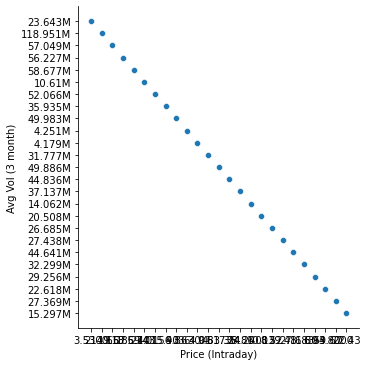

In [138]:
#Seaborn - this data is text so it will not plot in Seaborn without first converting/stripping. Even so, 
  #it is not the right data set for this type of plotting.
sns.relplot(data=mostActive_df, x='Price (Intraday)', y='Avg Vol (3 month)')